## Project 2 Example
Zhaoyang Jia, 02/25/22

In [1]:
conda install -c bioconda pubchempy

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::anaconda==2021.11=py39_0
done

## Package Plan ##

  environment location: /Users/zhaoyangjia/opt/anaconda3

  added / updated specs:
    - pubchempy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2021.11  |           py39_0           7 KB
    anaconda-custom            |           py39_1           4 KB
    ca-certificates-2021.10.8  |       h033912b_0         139 KB  conda-forge
    certifi-2021.10.8          |   py39h6e9494a_1         145 KB  conda-forge
    conda-4.11.0               |   py39h6e9494a_0        16.9 MB  conda-forge
    openssl-1.1.1l             |       h0d85af4_0         1.9 MB  conda-forge
    pubchempy-1.0.4            |     pyh864c0ab_2          18 KB  bioconda
    python_abi

In [5]:
conda install -c rdkit rdkit

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/osx-64::cairo==1.16.0=hec6a9b0_1003
  - conda-forge/osx-64::fontconfig==2.13.96=h10f422b_0
  - conda-forge/osx-64::openbabel==3.1.1=py39hb4f85b1_2
  - conda-forge/osx-64::pycairo==1.20.1=py39hbe14034_1
  - conda-forge/osx-64::rdkit==2020.09.3=py39h30cc4fc_0
  - conda-forge/noarch::mols2grid==0.2.1=pyhd8ed1ab_0
done

## Package Plan ##

  environment location: /Users/zhaoyangjia/opt/anaconda3

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    fontconfig-2.13.1          |       ha9ee91d_0         211 KB
    openbabel-3.1.1            |   py39hd5b7f93_1         5.2 MB  conda-forge
    ------------------------------------------------------------
                                           To

In [3]:
conda install -c conda-forge nglview

Solving environment: done

## Package Plan ##

  environment location: /Users/zhaoyangjia/opt/anaconda3

  added / updated specs:
    - nglview


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    nglview-3.0.3              |     pyh8a188c0_0         6.3 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.3 MB

The following NEW packages will be INSTALLED:

  nglview            conda-forge/noarch::nglview-3.0.3-pyh8a188c0_0



nglview-3.0.3        | 6.3 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install -c conda-forge mols2grid

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done
Solving environment: done

## Package Plan ##

  environment location: /Users/zhaoyangjia/opt/anaconda3

  added / updated specs:
    - mols2grid


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boost-1.72.0               |   py39hb64e6f8_1         346 KB  conda-forge
    boost-cpp-1.72.0           |       hdf9ef73_0        19.1 MB  conda-forge
    cairo-1.16.0               |    hec6a9b0_1003         1.3 MB  conda-forge
    fontconfig-2.13.1          |    h10f422b_1005         271 KB  conda-forge
    gettext-0.19.8.1           |    h7937167_1005         3.3 MB  conda-forge
    glib-2.68.4                |       he49afe7_0         429 KB  conda-forge
    glib-tools-2.68.4          |       he49afe7_0          81 KB  conda-forge
    icu-64.2                   |       h6de7cb9_1  

In [6]:
# Correctly import all the packages needed (5 points)
# Includes downloading packages as seen above. 
import pandas as pd
import numpy as np
import scipy as scip
import os
import pubchempy as pcp
import mols2grid
import nglview as ngl
from IPython.display import Image
from rdkit import Chem
from rdkit import DataStructs
import itertools
import matplotlib.pyplot as plt
import numpy as np
from rdkit.Chem import rdMolAlign
from rdkit.Chem.rdMolAlign import AlignMol
from rdkit.Chem import rdmolfiles
from rdkit.Chem import PandasTools
from rdkit.Chem.rdmolfiles import ForwardSDMolSupplier

In [8]:
# read in molecular data from the sdf that was saved from the PubChem website
# Define the global variable m (10 points for labeling all global variables)
m = Chem.SDMolSupplier('/Users/zhaoyangjia/Downloads/sorafenib_group.sdf')

# Get the number of molecules in the sdf file
# Define the global variable SDFFile
SDFFile = "/Users/zhaoyangjia/Downloads/sorafenib_group.sdf"

# use of built in rdkit function PandasTools.LoadSDF (similar to biopython)
# Reads in an SDF file and returns a pandas dataframe of the data for
# each compound.
# define a global variable PI3KLigs
PI3KLigs = PandasTools.LoadSDF(SDFFile)
# define a global variable lig_len
lig_len = len(PI3KLigs)

# check that the file is loaded correctly by uncommenting the line below
# this is a code check
print(PI3KLigs)

        chembl_id         chembl_pref_name ID  \
0   CHEMBL3426917                     None      
1   CHEMBL1289494                TIVOZANIB      
2   CHEMBL2105756  TIVOZANIB HYDROCHLORIDE      
3   CHEMBL1760433          [11C]-SORAFENIB      
4      CHEMBL1336                SORAFENIB      
5   CHEMBL4297490                  CM-4307      
6   CHEMBL1200485       SORAFENIB TOSYLATE      
7   CHEMBL2063878                     None      
8   CHEMBL4517714                     None      
9   CHEMBL2063879                     None      
10   CHEMBL275117                     None      
11  CHEMBL2153823                     None      
12  CHEMBL3542310                     None      
13   CHEMBL597365                     None      
14  CHEMBL2153824                     None      
15      CHEMBL535                SUNITINIB      
16  CHEMBL3109278                     None      
17     CHEMBL1567         SUNITINIB MALATE      
18  CHEMBL3939307                     None      
19  CHEMBL1289926   

In [9]:
# Save the molecules as fingerprints and save to the variable fps.
# Write the conversion as a function [15 points]

def Molecules2FingerPrints(molecules):
   
    # Create an RDKit similarity matrix, a function that reads in the 
    # molecules from the SDF Molecular Data type and turns these 
    # SMILES strings into molecular fingerprint.
    # define a local variable fps
    fps = [Chem.RDKFingerprint(x) for x in molecules]
    # Check the data store in fps by uncommenting the line below
    # print(fps) 10 points for code checks!
    # Create an empty matrix the right size for us to populate
    # Empty is a function that creates an empty numpy array.
    # define a local variable fps_sim_matrix
    fps_sim_matrix = np.empty(shape=(lig_len, lig_len))

    # Run a for-loop over each pair of compounds in fps to compute their chemical similarities
    # uses the range function to create an array of length lig_len
    # with each cell starting from 0 counting up to the length you specify.
    for i, j in itertools.product(range(lig_len), range(lig_len)):
    
        # To check that the for loop is correctly iterating over each of the compounds uncomment the line below
        #print(DataStructs.FingerprintSimilarity(fps[i],fps[j])) - 10 points for code checks
        fps_sim_matrix[i,j] = DataStructs.FingerprintSimilarity(fps[i],fps[j])

    # To check that the for loop correctly created a matrix of similarity score print the matrix by uncommenting the line below
    return(fps_sim_matrix)

# Define a global variable Similarity Matrix based on the function defined
# above. 
Similarity_Matrix = Molecules2FingerPrints(m)
print(Similarity_Matrix)
#[Code works correctly is 15 points, Code is commented well,succinct and includes code checks is 10 points]

[[1.         0.94852941 0.94852941 0.40282392 0.40282392 0.41343042
  0.39984289 0.37294564 0.36855506 0.37294564 0.36357745 0.39160839
  0.3719474  0.38581207 0.39160839 0.36858771 0.3719474  0.3719474
  0.31967213 0.32540862 0.34752268 0.36094276 0.36094276 0.35690236]
 [0.94852941 1.         1.         0.40893471 0.40893471 0.41618015
  0.40210356 0.35828535 0.35373711 0.35828535 0.3484252  0.37443802
  0.3556962  0.36809045 0.37443802 0.35384615 0.3556962  0.3556962
  0.31350114 0.31638847 0.33950178 0.35161069 0.35161069 0.34565366]
 [0.94852941 1.         1.         0.40893471 0.40893471 0.41618015
  0.40210356 0.35828535 0.35373711 0.35828535 0.3484252  0.37443802
  0.3556962  0.36809045 0.37443802 0.35384615 0.3556962  0.3556962
  0.31350114 0.31638847 0.33950178 0.35161069 0.35161069 0.34565366]
 [0.40282392 0.40893471 0.40893471 1.         1.         0.92704403
  0.88795181 0.34132968 0.33910035 0.34132968 0.3368719  0.35950413
  0.33603786 0.34043971 0.35950413 0.33837689 0.

In [11]:
mols2grid.display("/Users/zhaoyangjia/Downloads/sorafenib_group.sdf",
                 fixedBondLength=25)

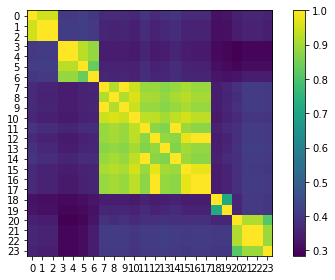

In [12]:
# 5 points for adequate commenting
# Set a figure and ax varialbe equal to plt.subplots()
fig, ax = plt.subplots()

# Instruct the heat map to show the axes
im = ax.imshow(Similarity_Matrix)

# Add a colorbar to the right of the heatmap
cbar = ax.figure.colorbar(im)

# Actually show the heatplot
plt.imshow(Similarity_Matrix)

# Set the X-axis & Y-Axis ticks
ax.set_xticks(np.arange(lig_len))
ax.set_yticks(np.arange(lig_len))

# Indicate how the tick labels are going to be displayed on the x-axis

# Save a PNG file with the heatmap 
plt.savefig('Compound_similarity_Pi3k.png')

# Show the heatmap
fig.tight_layout()
plt.show()

#[Code works - 2 points, and Code is well commented - 2 points]